# Data Preparation

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Siklus

# Done

In [3]:
# Memanggil data
df = pd.read_parquet('datavalidasi2_1cyc.parquet')
# Penambahan Cycle
df['Cell'] = 1
# Resistansi Internal
Ri_chg = 0.04281
Ri_dschg = 0.08001

In [5]:
df.drop(df[df['Current'] == 0].index, inplace=True)

In [64]:
# Memanggil data
df = pd.read_parquet('datavalidasi3_1cyc.parquet')
# Penambahan Cycle
df['Cell'] = 1
# Resistansi Internal
Ri_chg = 0.04281
Ri_dschg = 0.08001

#df.drop(df[df['Voltage'] < 2.67].index, inplace=True)
#df.drop(df[df['Voltage'] > 4.05].index, inplace=True)

In [2]:
df = pd.read_parquet('s1_training.parquet')
df.head()

Cell                    Time  Time (s)  dTime   Voltage   Current   
0     1 2018-09-05 20:00:10.430      0.00   0.00  4.150365 -1.020517  \
1     1 2018-09-05 20:00:11.420      0.99   0.99  4.148910 -1.020517   
2     1 2018-09-05 20:00:12.400      1.97   0.98  4.147455 -1.020517   
3     1 2018-09-05 20:00:13.410      2.98   1.01  4.146000 -1.019106   
4     1 2018-09-05 20:00:14.400      3.97   0.99  4.145273 -1.021929   

   Temperature  dCapacity_a  dCapacity_b  discharge capacity (Ah)   
0      26.1875     0.000000     0.000000                 0.000000  \
1      26.1875     0.000281     0.000281                 0.000281   
2      26.1875     0.000278     0.000558                 0.000558   
3      26.1875     0.000286     0.000844                 0.000844   
4      26.1875     0.000281     0.001125                 0.001125   

   charge capacity (Ah)    deltaV       DOD      SOCref       OCV  dEnergy_a   
0                   0.0  0.000000  0.000000  100.000000  4.232017  -0.000000  \
1                   0.0  0.001455  0.008254   99.991746  4.230562  -0.001164   
2                   0.0  0.001455  0.016425   99.983575  4.229107  -0.001152   
3                   0.0  0.001455  0.024834   99.975166  4.227539  -0.001185   
4                   0.0  0.000727  0.033100   99.966900  4.227038  -0.001165   

   dEnergy_b  discharge energy (Wh)  charge energy (Wh)  
0  -0.000000               0.000000                 0.0  
1  -0.001164               0.001164                 0.0  
2  -0.002317               0.002317                 0.0  
3  -0.003502               0.003502                 0.0  
4  -0.004667               0.004667                 0.0

In [175]:
# Memanggil data
df = pd.read_parquet('datatraining_15cyc_OCV.parquet')
# Penambahan Cycle
df['Cell'] = 19
# Resistansi Internal
Ri_chg = 0.04826
Ri_dschg = 0.08677

In [208]:
# Nilai OCV

def calc_ocv(row):
    if row['Current'] < 0:
        return row['Voltage'] - row['Current']*Ri_dschg
    else:
        return row['Voltage'] - row['Current']*Ri_chg

df['OCV'] = df.apply(calc_ocv, axis=1)

# Energi yang bertambah tiap detik
df['dEnergy_a'] = (df['OCV']*df['Current']*df['dTime']/3600)

# Akumulasi energi bertambah pada waktu ke-n
df['dEnergy_b'] = df['dEnergy_a'][0]

for i in range(1, len(df)):
    df.loc[i, 'dEnergy_b'] = df.loc[i-1, 'dEnergy_b'] + df.loc[i, 'dEnergy_a']

# Discharge Energy
en_min = df['dEnergy_b'].min()

def calc_edc(row):
    if row['Current'] <= 0:
        return abs(row['dEnergy_b'])
    else:
        return en_min*(-1)

df['discharge energy (Wh)'] = df.apply(calc_edc, axis=1)

# Charge Energy
def calc_ecc(row):
    if row['Current'] >= 0:
        return (en_min*(-1))+row['dEnergy_b']
    else:
        return 0
df['charge energy (Wh)'] = df.apply(calc_ecc, axis=1)

#df.drop(df[df['SOCref'] < 0].index, inplace=True)
#df.drop(df[df['SOCref'] > 100].index, inplace=True)

In [62]:
df = pd.read_parquet('s29_training.parquet')

# Energi yang bertambah tiap detik
df['dEnergy_a'] = (df['Voltage']*df['Current']*df['dTime']/3600)

# Akumulasi energi bertambah pada waktu ke-n
df['dEnergy_b'] = df['dEnergy_a'][0]

for i in range(1, len(df)):
    df.loc[i, 'dEnergy_b'] = df.loc[i-1, 'dEnergy_b'] + df.loc[i, 'dEnergy_a']

# Discharge Energy
en_min = df['dEnergy_b'].min()

def calc_edc(row):
    if row['Current'] <= 0:
        return abs(row['dEnergy_b'])
    else:
        return en_min*(-1)

df['discharge energy (Wh)'] = df.apply(calc_edc, axis=1)

# Charge Energy
def calc_ecc(row):
    if row['Current'] >= 0:
        return (en_min*(-1))+row['dEnergy_b']
    else:
        return 0
df['charge energy (Wh)'] = df.apply(calc_ecc, axis=1)

In [63]:
df.to_parquet('s29_training.parquet', index=False)

In [178]:
df.to_parquet('datatraining_15cyc_OCV.parquet', index=False)

In [209]:
df.describe()

Cell                           Time      Time (s)         dTime   
count  40869.0                          40869  40869.000000  40869.000000  \
mean       1.0  2018-09-17 12:10:42.782137600   3185.612138      0.155799   
min        1.0     2018-09-17 11:17:37.170000      0.000000      0.000000   
25%        1.0     2018-09-17 11:44:46.940000   1629.770000      0.060000   
50%        1.0  2018-09-17 12:10:02.990000128   3145.820000      0.120000   
75%        1.0     2018-09-17 12:36:42.400000   4745.230000      0.180000   
max        1.0     2018-09-17 13:03:44.500000   6367.330000     10.000000   
std        0.0                            NaN   1848.650173      0.177113   

            Voltage       Current   Temperature   dCapacity_a   dCapacity_b   
count  40869.000000  40869.000000  40869.000000  40869.000000  40869.000000  \
mean       3.620596     -1.457226     26.874196      0.000076      1.087718   
min        2.670404     -9.030803     26.250000      0.000000      0.000000   
25%        3.502950     -2.612694     26.375000      0.000010      0.345644   
50%        3.600942     -0.997933     26.562500      0.000036      1.286785   
75%        3.845571     -0.108686     27.250000      0.000097      1.543805   
max        4.049697      2.008894     29.750000      0.003090      2.572319   
std        0.259491      1.972934      0.715274      0.000121      0.709950   

       discharge capacity (Ah)  charge capacity (Ah)        deltaV   
count             40869.000000          40869.000000  40869.000000  \
mean                  1.366724              0.333396      0.002477   
min                   0.000004              0.000000      0.000000   
25%                   0.491065              0.000000      0.000364   
50%                   1.404295              0.000000      0.000727   
75%                   2.164593              0.000000      0.002182   
max                   2.572319              2.572538      0.127664   
std                   0.863201              0.704971      0.005572   

                DOD        SOCref           OCV     dEnergy_a     dEnergy_b   
count  40869.000000  40869.000000  40869.000000  40869.000000  40869.000000  \
mean      28.792526     61.207480      3.742919     -0.000238     -4.287422   
min        0.000000     21.909193      2.858598     -0.009566     -9.733718   
25%        9.149399     49.134570      3.591557     -0.000342     -6.102773   
50%       34.061949     55.938051      3.697990     -0.000100     -5.126201   
75%       40.865430     80.850601      3.954981     -0.000008     -1.408498   
max       68.090807     90.005779      4.348302      0.002059      0.000875   
std       18.792800     18.792808      0.228062      0.000482      2.739961   

       discharge energy (Wh)  charge energy (Wh)  
count           40869.000000        40869.000000  
mean                5.310825            1.222826  
min                 0.000002            0.000000  
25%                 1.987488            0.000000  
50%                 5.579074            0.000000  
75%                 8.351115            0.000000  
max                 9.733718            9.734592  
std                 3.258654            2.616328

In [170]:
df = pd.read_parquet('datatraining_20cyc.parquet')

In [16]:
df['SOCref'] = 100-df['DOD']

In [177]:
df.drop(df[df['SOCref'] < 0].index, inplace=True)
df.drop(df[df['SOCref'] > 100].index, inplace=True)

In [38]:
# Mencari nilai SOC
df['SOCref'] = (df['dCapacity_b'].max()-df['dCapacity_b'])/3.4*100

In [66]:
df.describe()

Cell                           Time      Time (s)         dTime   
count  39402.0                          39402  39402.000000  39402.000000  \
mean       1.0  2018-09-17 12:10:48.622953472   3191.452953      0.156510   
min        1.0     2018-09-17 11:17:37.170000      0.000000      0.000000   
25%        1.0  2018-09-17 11:44:47.917499904   1630.747500      0.060000   
50%        1.0  2018-09-17 12:10:03.270000128   3146.100000      0.120000   
75%        1.0  2018-09-17 12:37:04.315000064   4767.145000      0.190000   
max        1.0     2018-09-17 13:03:44.500000   6367.330000      4.970000   
std        0.0                            NaN   1852.094492      0.157519   

            Voltage       Current   Temperature   dCapacity_a   dCapacity_b   
count  39402.000000  39402.000000  39402.000000  39402.000000  39402.000000  \
mean       3.618457     -1.511481     26.875198      0.000079      1.088858   
min        2.670404     -9.030803     26.250000      0.000000      0.000000   
25%        3.500083     -2.690327     26.375000      0.000012      0.345860   
50%        3.600063     -1.085447     26.562500      0.000039      1.286751   
75%        3.843025     -0.177850     27.250000      0.000100      1.545239   
max        4.049697      2.008894     29.750000      0.003090      2.572319   
std        0.260480      1.988815      0.716393      0.000122      0.711298   

       discharge capacity (Ah)  charge capacity (Ah)        deltaV   
count             39402.000000          39402.000000  39402.000000  \
mean                  1.378252              0.289394      0.002498   
min                   0.000004              0.000000      0.000000   
25%                   0.491991              0.000000      0.000364   
50%                   1.419495              0.000000      0.000727   
75%                   2.210769              0.000000      0.002182   
max                   2.572319              2.572538      0.127664   
std                   0.867376              0.666884      0.005647   

                DOD        SOCref           OCV     dEnergy_a     dEnergy_b   
count  39402.000000  39402.000000  39402.000000  39402.000000  39402.000000  \
mean      32.025233    132.025233      3.745335     -0.000247     -4.291497   
min        0.000000    100.000000      2.858598     -0.009566     -9.733718   
25%       10.172356    110.172356      3.592332     -0.000356     -6.107909   
50%       37.845616    137.845616      3.704180     -0.000111     -5.126061   
75%       45.448217    145.448217      3.955848     -0.000014     -1.409347   
max       75.656452    175.656452      4.348302      0.002059      0.000875   
std       20.920543     20.920543      0.227861      0.000489      2.744774   

       discharge energy (Wh)  charge energy (Wh)  
count           39402.000000        39402.000000  
mean                5.353003            1.061505  
min                 0.000002            0.000000  
25%                 1.991070            0.000000  
50%                 5.639399            0.000000  
75%                 8.509950            0.000000  
max                 9.733718            9.734592  
std                 3.272916            2.474337

In [288]:
df.to_parquet('s2_training.parquet', index=False)

In [33]:
df.to_parquet('datatraining_20cyc.parquet', index=False)

In [71]:
df.to_parquet('datavalidasi3_1cyc.parquet', index=False)

In [6]:
df.to_parquet('datavalidasi2_1cyc.parquet', index=False)

In [312]:
df.to_excel('datavalidasi2_1cyc.xlsx', index=False)

# Preparation

In [67]:
# Training
# Penambahan dTime
import pandas as pd

# ubah kolom waktu menjadi tipe datetime
df['Time'] = pd.to_datetime(df['Time'])

# hitung selisih waktu dari waktu awal
df['Time (s)'] = (df['Time'] - df['Time'][0]).dt.total_seconds()

# selisih waktu
df['dTime'] = df['Time (s)'][0]

for i in range(1, len(df)):
    df.loc[i, 'dTime'] = abs(df.loc[i, 'Time (s)'] - df.loc[i-1, 'Time (s)'])

# Kapasitas yang berkurang tiap detik
df['dCapacity_a'] = df['Current']*df['dTime']/3600

# Akumulasi kapasitas berkurang pada waktu ke-n
df['dCapacity_b'] = df['dCapacity_a'][0]

for i in range(1, len(df)):
    df.loc[i, 'dCapacity_b'] = df.loc[i-1, 'dCapacity_b'] + df.loc[i, 'dCapacity_a']

# Selisih tegangan
df = df.assign(Vb=df['Voltage'].shift(1))
df = df.assign(deltaV=abs(df['Voltage'] - df['Vb']))
del df['Vb']
df['deltaV'][0] = 0

# Nilai OCV

def calc_ocv(row):
    if row['Current'] < 0:
        return row['Voltage'] - row['Current']*Ri_dschg
    else:
        return row['Voltage'] - row['Current']*Ri_chg

df['OCV'] = df.apply(calc_ocv, axis=1)

# Energi yang bertambah tiap detik
df['dEnergy_a'] = (df['Voltage']*df['Current']*df['dTime']/3600)

# Akumulasi energi bertambah pada waktu ke-n
df['dEnergy_b'] = df['dEnergy_a'][0]

for i in range(1, len(df)):
    df.loc[i, 'dEnergy_b'] = df.loc[i-1, 'dEnergy_b'] + df.loc[i, 'dEnergy_a']

# Discharge Capacity
cap_min = df['dCapacity_b'].min()

def calc_dc(row):
    if row['Current'] <= 0:
        return abs(row['dCapacity_b'])
    else:
        return cap_min*(-1)

df['discharge capacity (Ah)'] = df.apply(calc_dc, axis=1)

# Charge Capacity

def calc_cc(row):
    if row['Current'] >= 0:
        return (cap_min*(-1))+row['dCapacity_b']
    else:
        return 0

df['charge capacity (Ah)'] = df.apply(calc_cc, axis=1)

# Discharge Energy
en_min = df['dEnergy_b'].min()

def calc_edc(row):
    if row['Current'] <= 0:
        return abs(row['dEnergy_b'])
    else:
        return en_min*(-1)

df['discharge energy (Wh)'] = df.apply(calc_edc, axis=1)

# Charge Energy
def calc_ecc(row):
    if row['Current'] >= 0:
        return (en_min*(-1))+row['dEnergy_b']
    else:
        return 0
df['charge energy (Wh)'] = df.apply(calc_ecc, axis=1)

# Mencari nilai DOD
df['DOD'] = abs((df['dCapacity_b']*-1/3.4)*100)

# Mencari nilai SOC
df['SOCref'] = (3.4+df['dCapacity_b'])/3.4*100

C:\Users\wilyf\AppData\Local\Temp\ipykernel_20500\1526238908.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deltaV'][0] = 0


In [69]:
# Nilai OCV

def calc_ocv(row):
    if row['Current'] < 0:
        return row['Voltage'] - row['Current']*Ri_dschg
    else:
        return row['Voltage'] - row['Current']*Ri_chg

df['OCV'] = df.apply(calc_ocv, axis=1)

In [68]:
# Pengurutan Kolom
df['dCapacity_a'] = abs(df['dCapacity_a'])
df['dCapacity_b'] = abs(df['dCapacity_b'])
df['dEnergy_a'] = abs(df['dEnergy_a'])
df['dEnergy_b'] = abs(df['dEnergy_b'])

In [70]:
# Dataframe
df = df[['Cell', 'Time', 'Time (s)', 'dTime', 'Voltage', 'Current', 'Temperature', 'dCapacity_a', 'dCapacity_b', 'discharge capacity (Ah)', 'charge capacity (Ah)', 'deltaV', 'DOD', 'SOCref', 'OCV', 'dEnergy_a', 'dEnergy_b', 'discharge energy (Wh)', 'charge energy (Wh)']]

In [6]:
df.describe()

Cell                           Time      Time (s)         dTime   
count  41000.0                          41000  41000.000000  41000.000000  \
mean       1.0  2018-09-17 12:10:47.076636416   3189.906636      0.155301   
min        1.0     2018-09-17 11:17:37.170000      0.000000      0.000000   
25%        1.0  2018-09-17 11:44:46.335000064   1629.165000      0.060000   
50%        1.0  2018-09-17 12:10:06.590000128   3149.420000      0.120000   
75%        1.0  2018-09-17 12:36:50.269999872   4753.100000      0.180000   
max        1.0     2018-09-17 13:03:44.500000   6367.330000     10.000000   
std        0.0                            NaN   1854.136929      0.176005   

            Voltage       Current   Temperature   dCapacity_a   dCapacity_b   
count  41000.000000  41000.000000  41000.000000  41000.000000  41000.000000  \
mean       3.618806     -1.468520     26.879401      0.000076      1.089933   
min        2.643489     -9.085852     26.250000      0.000000      0.000000   
25%        3.502223     -2.625398     26.375000      0.000010      0.345387   
50%        3.600790     -1.002874     26.562500      0.000036      1.286678   
75%        3.845571     -0.107274     27.250000      0.000097      1.544487   
max        4.053697      2.008894     29.750000      0.002015      2.579997   
std        0.263446      1.994511      0.724406      0.000118      0.713047   

       discharge capacity (Ah)  charge capacity (Ah)        deltaV   
count             41000.000000          41000.000000  41000.000000  \
mean                  1.371818              0.336380      0.002489   
min                   0.000033              0.000000      0.000000   
25%                   0.491252              0.000000      0.000364   
50%                   1.414668              0.000000      0.000727   
75%                   2.181876              0.000000      0.002182   
max                   2.579997              2.580245      0.127664   
std                   0.866457              0.710147      0.005635   

                DOD        SOCref           OCV     dEnergy_a     dEnergy_b   
count  41000.000000  41000.000000  41000.000000  41000.000000  41000.000000  \
mean      32.056855     67.943153      3.755343      0.000265      3.962466   
min        0.000000     24.117723      2.875904      0.000000      0.000000   
25%       10.158429     54.573919      3.607107      0.000036      1.335347   
50%       37.843463     62.156537      3.717857      0.000133      4.713617   
75%       45.426081     89.841571      3.964030      0.000345      5.611250   
max       75.882277    100.007284      4.348302      0.006825      8.907441   
std       20.971962     20.971974      0.226690      0.000400      2.517199   

       discharge energy (Wh)  charge energy (Wh)  
count           41000.000000        41000.000000  
mean                4.899571            1.118029  
min                 0.000145            0.000000  
25%                 1.887601            0.000000  
50%                 5.155835            0.000000  
75%                 7.732567            0.000000  
max                 8.907441            8.908444  
std                 2.977546            2.393510

In [172]:
# Melihat data pada rentang kurang dari 0
filtered_data = df.loc[(df['Current'] < 0) & (df['Voltage'] < 2.7)]

# Menampilkan data yang telah difilter
print(filtered_data)

        Cell                    Time  Time (s)  dTime   Voltage   Current   
13137      1 2018-09-05 23:19:13.400  11942.97   1.00  2.699138 -1.019106  \
13138      1 2018-09-05 23:19:14.410  11943.98   1.01  2.698410 -1.020517   
13139      1 2018-09-05 23:19:15.410  11944.98   1.00  2.697319 -1.020517   
13140      1 2018-09-05 23:19:16.420  11945.99   1.01  2.696228 -1.020517   
13141      1 2018-09-05 23:19:17.420  11946.99   1.00  2.695864 -1.017694   
...      ...                     ...       ...    ...       ...       ...   
532339    20 2018-09-05 23:33:46.760  11970.02   0.96  2.653880 -1.022165   
532340    20 2018-09-05 23:33:47.750  11971.01   0.99  2.653152 -1.019356   
532341    20 2018-09-05 23:33:48.760  11972.02   1.01  2.652061 -1.017952   
532342    20 2018-09-05 23:33:49.770  11973.03   1.01  2.650605 -1.019356   
532343    20 2018-09-05 23:33:50.310  11973.57   0.54  2.650241 -1.016548   

        Temperature  dCapacity_a  dCapacity_b  discharge capacity (Ah)   
1

In [19]:
len(filtered_data)

550

# Normalisasi: Min-Max Scaling

In [165]:
df = pd.read_parquet('datavalidasi_8cyc.parquet')

In [275]:
df = pd.read_parquet('s29_training.parquet')
df.describe()

Cell                           Time      Time (s)         dTime   
count  27156.0                          27156  27156.000000  27156.000000  \
mean      29.0  2019-04-18 00:25:47.808509184  12625.938509      0.928858   
min       29.0     2019-04-17 20:55:21.870000      0.000000      0.000000   
25%       29.0  2019-04-17 22:38:13.055000064   6171.185000      0.980000   
50%       29.0  2019-04-18 00:30:03.899999744  12882.030000      1.000000   
75%       29.0  2019-04-18 02:12:55.352499968  19053.482500      1.010000   
max       29.0     2019-04-18 03:55:45.930000  25224.060000     10.030000   
std        0.0                            NaN   7360.780875      0.409991   

            Voltage       Current   Temperature   dCapacity_a   dCapacity_b   
count  27156.000000  27156.000000  27156.000000  27156.000000  27156.000000  \
mean       3.739649      0.001725     27.106010      0.000244      1.578768   
min        2.650282     -1.028274     26.875000      0.000000      0.000000   
25%        3.527356     -1.019753     27.062500      0.000249      0.699052   
50%        3.761102      0.174668     27.125000      0.000280      1.572650   
75%        3.998587      1.019609     27.187500      0.000286      2.446441   
max        4.199703      1.028129     27.375000      0.000298      3.302872   
std        0.324254      0.984516      0.076899      0.000076      0.999084   

       discharge capacity (Ah)  charge capacity (Ah)        deltaV   
count             27156.000000          27156.000000  27156.000000  \
mean                  2.522540              0.943994      0.000286   
min                   0.000000              0.000000      0.000000   
25%                   1.747528              0.000000      0.000000   
50%                   3.302872              0.157642      0.000365   
75%                   3.302872              1.904804      0.000365   
max                   3.302872              3.314759      0.092002   
std                   1.053322              1.167343      0.000721   

                DOD        SOCref           OCV     dEnergy_a     dEnergy_b   
count  27156.000000  27156.000000  27156.000000  27156.000000  27156.000000  \
mean      46.434352     52.019628      3.804826      0.000907      5.870882   
min        0.000000      0.000000      2.650282      0.000000      0.000000   
25%       20.560363     25.836889      3.598951      0.000845      2.555842   
50%       46.254420     52.197507      3.830034      0.001014      5.944368   
75%       71.954155     78.552301      4.074318      0.001094      9.125910   
max       97.143291    100.000000      4.244941      0.001243     11.979101   
std       29.384810     30.151011      0.315022      0.000287      3.684488   

       discharge energy (Wh)  charge energy (Wh)  
count           27156.000000        27156.000000  
mean                9.287814            3.478936  
min                 0.000000            0.000000  
25%                 6.763348            0.000000  
50%                11.979101            0.510229  
75%                11.979101            6.897322  
max                11.979101           12.644329  
std                 3.717431            4.382544

In [193]:
# Min-Max Scaling
df['SOCnorm'] = ((df['SOCref']-df['SOCref'].min())/(df['SOCref'].max()-df['SOCref'].min()))*100

In [194]:
# Menghitung nilai kesalahan menggunakan MAE
mae = np.mean(np.abs(df['SOCref'] - df['SOCnorm']))
print("MAE:", mae)

# Menghitung nilai kesalahan menggunakan RMSE
rmse = np.sqrt(np.mean((df['SOCref'] - df['SOCnorm']) ** 2))
print("RMSE:", rmse)

MAE: 0.3457528386764079
RMSE: 0.3998832699747565


In [274]:
df.to_parquet('s29_training.parquet', index=False)

In [57]:
df.to_parquet('datavalidasi2_1cyc.parquet', index=False)

In [70]:
df = df.assign(SOCb=df['SOCref'].shift(1))
df = df.assign(dSOC=abs(df['SOCref'] - df['SOCb']))
del df['SOCb']
df['dSOC'][0] = 0

C:\Users\wilyf\AppData\Local\Temp\ipykernel_19340\2919248291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dSOC'][0] = 0


In [10]:
df.head(1000000)

Cell                    Time  Time (s)  dTime   Voltage   Current   
0          1 2018-09-05 20:00:10.430      0.00   0.00  4.150365 -1.020517  \
1          1 2018-09-05 20:00:11.420      0.99   0.99  4.148910 -1.020517   
2          1 2018-09-05 20:00:12.400      1.97   0.98  4.147455 -1.020517   
3          1 2018-09-05 20:00:13.410      2.98   1.01  4.146000 -1.019106   
4          1 2018-09-05 20:00:14.400      3.97   0.99  4.145273 -1.021929   
...      ...                     ...       ...    ...       ...       ...   
559538    20 2018-09-06 03:30:45.180  26188.44   1.00  4.198270  0.068719   
559539    20 2018-09-06 03:30:46.140  26189.40   0.96  4.197906  0.070121   
559540    20 2018-09-06 03:30:46.180  26189.44   0.04  4.198270  0.070121   
559541    20 2018-09-06 03:30:47.170  26190.43   0.99  4.198270  0.070121   
559542    20 2018-09-06 03:30:48.170  26191.43   1.00  4.198270  0.068719   

        Temperature   dCapacity_a  dCapacity_b  discharge capacity (Ah)   
0           26.1875  0.000000e+00     0.000000                 0.000000  \
1           26.1875  2.806423e-04     0.000281                 0.000281   
2           26.1875  2.778075e-04     0.000558                 0.000558   
3           26.1875  2.859158e-04     0.000844                 0.000844   
4           26.1875  2.810305e-04     0.001125                 0.001125   
...             ...           ...          ...                      ...   
559538      26.1875  1.908856e-05     0.031424                 3.389927   
559539      26.1875  1.869900e-05     0.031443                 3.389927   
559540      26.1875  7.791251e-07     0.031444                 3.389927   
559541      26.1875  1.928335e-05     0.031463                 3.389927   
559542      26.1875  1.908856e-05     0.031482                 3.389927   

        charge capacity (Ah)    deltaV       DOD      SOCref       OCV   
0                   0.000000  0.000000  0.000000  100.000000  4.232017  \
1                   0.000000  0.001455  0.008254   99.991746  4.230562   
2                   0.000000  0.001455  0.016425   99.983575  4.229107   
3                   0.000000  0.001455  0.024834   99.975166  4.227539   
4                   0.000000  0.000727  0.033100   99.966900  4.227038   
...                      ...       ...       ...         ...       ...   
559538              3.421352  0.000364  0.924248  100.924248  4.201240   
559539              3.421370  0.000364  0.924798  100.924798  4.200936   
559540              3.421371  0.000364  0.924821  100.924821  4.201300   
559541              3.421390  0.000000  0.925388  100.925388  4.201300   
559542              3.421409  0.000000  0.925950  100.925950  4.201240   

        dEnergy_a  dEnergy_b  discharge energy (Wh)  charge energy (Wh)   
0        0.000000   0.000000               0.000000            0.000000  \
1        0.001164   0.001164               0.001164            0.000000   
2        0.001152   0.002317               0.002317            0.000000   
3        0.001185   0.003502               0.003502            0.000000   
4        0.001165   0.004667               0.004667            0.000000   
...           ...        ...                    ...                 ...   
559538   0.000080   0.750046              12.290917           13.040964   
559539   0.000078   0.750125              12.290917           13.041042   
559540   0.000003   0.750128              12.290917           13.041045   
559541   0.000081   0.750209              12.290917           13.041126   
559542   0.000080   0.750289              12.290917           13.041206   

            dSOC  
0       0.000000  
1       0.008254  
2       0.008171  
3       0.008409  
4       0.008266  
...          ...  
559538  0.000561  
559539  0.000550  
559540  0.000023  
559541  0.000567  
559542  0.000561  

[559543 rows x 20 columns]

In [19]:
df.describe()

Cell                           Time      Time (s)         dTime   
count  41000.0                          41000  41000.000000  41000.000000  \
mean       1.0  2018-09-17 12:10:47.076636416   3189.906636      0.155301   
min        1.0     2018-09-17 11:17:37.170000      0.000000      0.000000   
25%        1.0  2018-09-17 11:44:46.335000064   1629.165000      0.060000   
50%        1.0  2018-09-17 12:10:06.590000128   3149.420000      0.120000   
75%        1.0  2018-09-17 12:36:50.269999872   4753.100000      0.180000   
max        1.0     2018-09-17 13:03:44.500000   6367.330000     10.000000   
std        0.0                            NaN   1854.136929      0.176005   

            Voltage       Current   Temperature   dCapacity_a   dCapacity_b   
count  41000.000000  41000.000000  41000.000000  41000.000000  41000.000000  \
mean       3.618806     -1.468520     26.879401      0.000076      1.089933   
min        2.643489     -9.085852     26.250000      0.000000      0.000000   
25%        3.502223     -2.625398     26.375000      0.000010      0.345387   
50%        3.600790     -1.002874     26.562500      0.000036      1.286678   
75%        3.845571     -0.107274     27.250000      0.000097      1.544487   
max        4.053697      2.008894     29.750000      0.002015      2.579997   
std        0.263446      1.994511      0.724406      0.000118      0.713047   

       discharge capacity (Ah)  charge capacity (Ah)        deltaV   
count             41000.000000          41000.000000  41000.000000  \
mean                  1.371818              0.336380      0.002489   
min                   0.000033              0.000000      0.000000   
25%                   0.491252              0.000000      0.000364   
50%                   1.414668              0.000000      0.000727   
75%                   2.181876              0.000000      0.002182   
max                   2.579997              2.580245      0.127664   
std                   0.866457              0.710147      0.005635   

                DOD        SOCref           OCV     dEnergy_a     dEnergy_b   
count  41000.000000  41000.000000  41000.000000  41000.000000  41000.000000  \
mean      32.056855     67.943153      3.755343      0.000265      3.962466   
min        0.000000     24.117723      2.875904      0.000000      0.000000   
25%       10.158429     54.573919      3.607107      0.000036      1.335347   
50%       37.843463     62.156537      3.717857      0.000133      4.713617   
75%       45.426081     89.841571      3.964030      0.000345      5.611250   
max       75.882277    100.007284      4.348302      0.006825      8.907441   
std       20.971962     20.971974      0.226690      0.000400      2.517199   

       discharge energy (Wh)  charge energy (Wh)  
count           41000.000000        41000.000000  
mean                4.899571            1.118029  
min                 0.000145            0.000000  
25%                 1.887601            0.000000  
50%                 5.155835            0.000000  
75%                 7.732567            0.000000  
max                 8.907441            8.908444  
std                 2.977546            2.393510

In [20]:
df.to_parquet('datavalidasi3_1cyc.parquet', index=False)
df.to_csv('datavalidasi3_1cyc.csv', index=False)
print('3')

3


In [105]:
df = pd.read_parquet('s19_training.parquet')
df.describe()

Cell                           Time      Time (s)         dTime   
count  27843.0                          27843  27843.000000  27843.000000  \
mean      19.0  2018-09-05 23:45:17.437355520  12943.777356      0.933646   
min       19.0     2018-09-05 20:09:33.660000      0.000000      0.000000   
25%       19.0  2018-09-05 21:55:01.564999936   6327.905000      0.970000   
50%       19.0     2018-09-05 23:49:28.960000  13195.300000      1.000000   
75%       19.0  2018-09-06 01:34:56.455000064  19522.795000      1.010000   
max       19.0     2018-09-06 03:22:49.170000  25995.510000     10.010000   
std        0.0                            NaN   7550.527574      0.436985   

            Voltage       Current   Temperature   dCapacity_a   dCapacity_b   
count  27843.000000  27843.000000  27843.000000  27843.000000  27843.000000  \
mean       3.736969     -0.003370     27.550387      0.000244      1.630179   
min        2.649617     -1.025703     27.000000      0.000000      0.000000   
25%        3.524253     -1.020075     27.312500      0.000256      0.727248   
50%        3.757453      0.156019     27.562500      0.000281      1.623670   
75%        3.999587      1.020448     27.750000      0.000286      2.520296   
max        4.199847      1.026070     28.562500      0.000303      3.399561   
std        0.326330      0.984207      0.278333      0.000081      1.024838   

       discharge capacity (Ah)  charge capacity (Ah)        deltaV   
count             27843.000000          27843.000000  27843.000000  \
mean                  2.593733              0.963554      0.000276   
min                   0.000000              0.000000      0.000000   
25%                   1.792778              0.000000      0.000000   
50%                   3.399561              0.151369      0.000365   
75%                   3.399561              1.944936      0.000365   
max                   3.399561              3.391002      0.088874   
std                   1.084902              1.194259      0.000689   

                DOD        SOCref           OCV     dEnergy_a     dEnergy_b   
count  27843.000000  27843.000000  27843.000000  27843.000000  27843.000000  \
mean      47.946441     52.053559      3.802098      0.000907      6.053713   
min        0.000000      0.012909      2.649617      0.000000      0.000000   
25%       21.389652     25.873654      3.595808      0.000890      2.663346   
50%       47.755008     52.244992      3.825544      0.001017      6.138259   
75%       74.126346     78.610348      4.073088      0.001095      9.400057   
max       99.987091    100.000000      4.249094      0.001247     12.324090   
std       30.142308     30.142308      0.317864      0.000308      3.790116   

       discharge energy (Wh)  charge energy (Wh)  
count           27843.000000        27843.000000  
mean                9.547091            3.546334  
min                 0.000000            0.000000  
25%                 6.939180            0.000000  
50%                12.324090            0.486424  
75%                12.324090            7.030422  
max                12.324090           12.923052  
std                 3.826482            4.478664

In [ ]:
# Discharge Capacity
cap_min = df['dCapacity_b'].min()

def calc_dc(row):
    if row['Current'] <= 0:
        return abs(row['dCapacity_b'])
    else:
        return cap_min*(-1)

df['discharge capacity (Ah)'] = df.apply(calc_dc, axis=1)

# Charge Capacity

def calc_cc(row):
    if row['Current'] >= 0:
        return (cap_min*(-1))+row['dCapacity_b']
    else:
        return 0

df['charge capacity (Ah)'] = df.apply(calc_cc, axis=1)

# Discharge Energy
en_min = df['dEnergy_b'].min()

def calc_edc(row):
    if row['Current'] <= 0:
        return abs(row['dEnergy_b'])
    else:
        return en_min*(-1)

df['discharge energy (Wh)'] = df.apply(calc_edc, axis=1)

# Charge Energy
def calc_ecc(row):
    if row['Current'] >= 0:
        return (en_min*(-1))+row['dEnergy_b']
    else:
        return 0
df['charge energy (Wh)'] = df.apply(calc_ecc, axis=1)

In [14]:
df.describe()

Cycle                           Time      Time (s)         dTime   
count  24790.0                          24790  24790.000000  24790.000000  \
mean       2.0  2018-09-07 13:26:20.022079744  11512.342080      0.931765   
min        2.0     2018-09-07 10:14:27.680000      0.000000      0.000000   
25%        2.0  2018-09-07 11:48:21.942499840   5634.262500      0.970000   
50%        2.0     2018-09-07 13:22:15.640000  11267.960000      1.000000   
75%        2.0  2018-09-07 15:04:52.922500096  17425.242500      1.010000   
max        2.0     2018-09-07 16:39:26.140000  23098.460000      6.970000   
std        0.0                            NaN   6737.988086      0.406626   

            Voltage       Current   Temperature   dCapacity_a   dCapacity_b   
count  24790.000000  24790.000000  24790.000000  24790.000000  24790.000000  \
mean       3.680266     -0.072941     27.587762      0.000257      1.811706   
min        2.651076     -1.025703     27.000000      0.000000      0.000000   
25%        3.498180     -1.020075     27.312500      0.000275      1.018190   
50%        3.706160     -1.018668     27.562500      0.000281      1.819236   
75%        3.923738      1.020448     27.812500      0.000286      2.620040   
max        4.179364      1.026070     28.562500      0.000303      3.403877   
std        0.302492      1.014681      0.288189      0.000076      0.937491   

       discharge capacity (Ah)  charge capacity (Ah)        deltaV   
count             24790.000000          24790.000000  24790.000000  \
mean                  2.496535              0.684829      0.000276   
min                   0.000000              0.000000      0.000000   
25%                   1.596274              0.000000      0.000000   
50%                   3.192493              0.000000      0.000365   
75%                   3.403877              1.360077      0.000365   
max                   3.403877              2.967841      0.063340   
std                   1.111675              0.941204      0.000609   

                DOD        SOCref           OCV     dEnergy_a     dEnergy_b   
count  24790.000000  24790.000000  24790.000000  24790.000000  24790.000000  \
mean      53.285469     46.714531      3.665810      0.000947      6.741931   
min        0.000000     -0.114020      2.586648      0.000000      0.000000   
25%       29.946753     22.939997      3.478970      0.000956      3.820437   
50%       53.506944     46.493056      3.702595      0.001031      6.873285   
75%       77.060003     70.053247      3.919114      0.001099      9.756183   
max      100.114020    100.000000      4.213403      0.001237     12.341541   
std       27.573256     27.573256      0.317810      0.000290      3.448148   

       discharge energy (Wh)  charge energy (Wh)  
count           24790.000000        24790.000000  
mean                9.214620            2.472690  
min                 0.000000            0.000000  
25%                 6.223578            0.000000  
50%                11.730904            0.000000  
75%                12.341541            4.799387  
max                12.341541           11.138557  
std                 3.927766            3.453522

In [2]:
df = pd.read_parquet('datatraining_20cyc.parquet')

In [3]:
plt.figure(figsize = (16,6))
plt.title('Time Series Perubahan Kapasitas tiap Siklus', fontsize = 18)
plt.scatter(df['Time (s)'], df['discharge capacity (Ah)'], color="red")
plt.scatter(df['Time (s)'], df['charge capacity (Ah)'], color="green")

plt.xlabel('Waktu tiap siklus (s)', fontsize = 15)
plt.ylabel('Perubahan Kapasitas (Ah)', fontsize = 15)

plt.grid(True)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


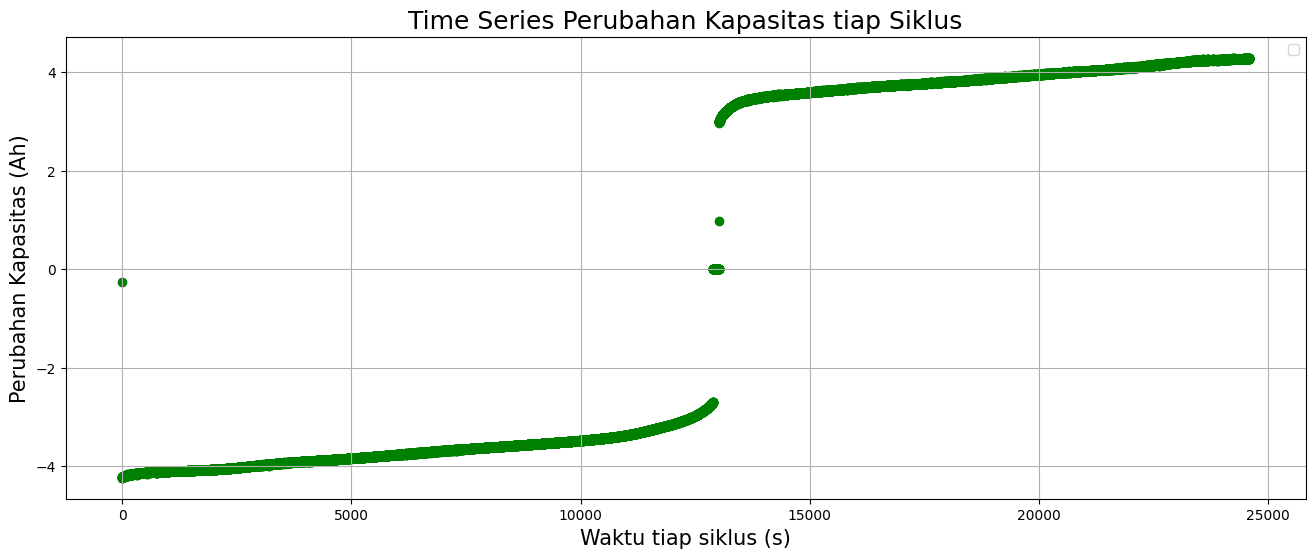

In [10]:
plt.figure(figsize = (16,6))
plt.title('Time Series Perubahan Kapasitas tiap Siklus', fontsize = 18)
plt.scatter(df.index, df['Voltage']*df['Current'], color="green")

plt.xlabel('Waktu tiap siklus (s)', fontsize = 15)
plt.ylabel('Perubahan Kapasitas (Ah)', fontsize = 15)

plt.grid(True)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


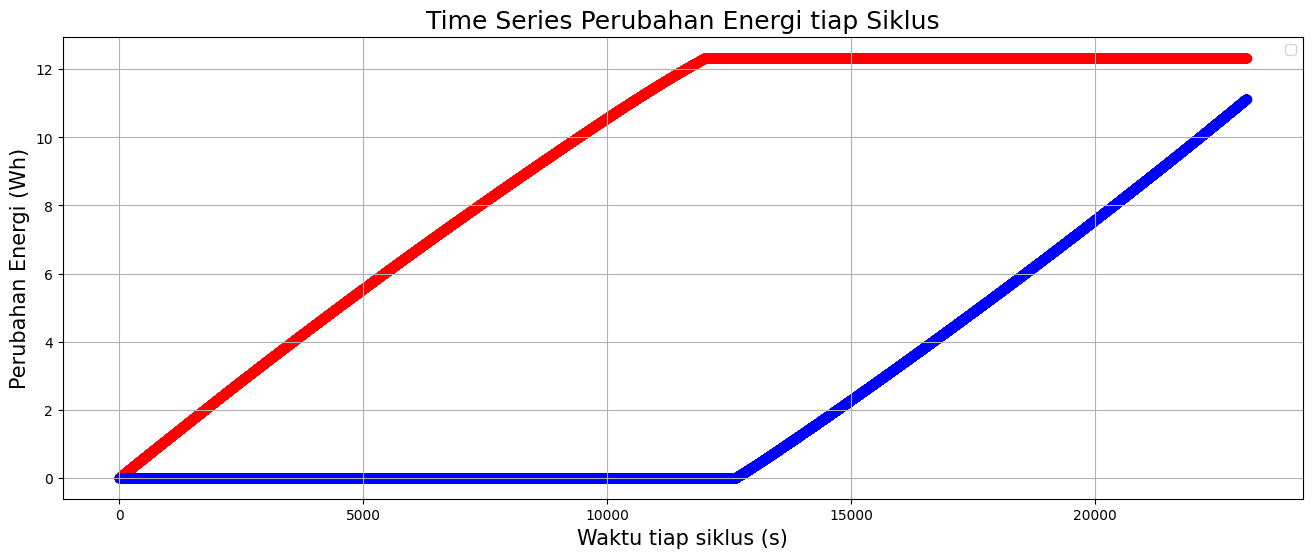

In [5]:
plt.figure(figsize = (16,6))
plt.title('Time Series Perubahan Energi tiap Siklus', fontsize = 18)
plt.scatter(df['Time (s)'], df['discharge energy (Wh)'], color="red")
plt.scatter(df['Time (s)'], df['charge energy (Wh)'], color="blue")

plt.xlabel('Waktu tiap siklus (s)', fontsize = 15)
plt.ylabel('Perubahan Energi (Wh)', fontsize = 15)

plt.grid(True)
plt.legend()

In [257]:
df.to_parquet('s2_training.parquet', index=False)
df.to_csv('s2_training.csv', index=False)

In [204]:
df.to_parquet('datavalidasi.parquet', index=False)
df.to_csv('datavalidasi.csv', index=False)

# Round Trip Efficiency: Data Training

In [25]:
df1 = pd.read_parquet('s1_training.parquet')
df2 = pd.read_parquet('s2_training.parquet')
df3 = pd.read_parquet('s3_training.parquet')
df4 = pd.read_parquet('s4_training.parquet')
df5 = pd.read_parquet('s5_training.parquet')
df6 = pd.read_parquet('s6_training.parquet')
df7 = pd.read_parquet('s7_training.parquet')
df8 = pd.read_parquet('s8_training.parquet')
df9 = pd.read_parquet('s9_training.parquet')
df10 = pd.read_parquet('s10_training.parquet')
df11 = pd.read_parquet('s11_training.parquet')
df12 = pd.read_parquet('s12_training.parquet')
df13 = pd.read_parquet('s13_training.parquet')
df14 = pd.read_parquet('s14_training.parquet')
df15 = pd.read_parquet('s15_training.parquet')
df16 = pd.read_parquet('s16_training.parquet')
df17 = pd.read_parquet('s17_training.parquet')
df18 = pd.read_parquet('s18_training.parquet')
df19 = pd.read_parquet('s19_training.parquet')
df20 = pd.read_parquet('s20_training.parquet')

In [26]:
RTE1 = abs(df1['discharge energy (Wh)'].max()/df1['charge energy (Wh)'].max())*100
RTE2 = abs(df2['discharge energy (Wh)'].max()/df2['charge energy (Wh)'].max())*100
RTE3 = abs(df3['discharge energy (Wh)'].max()/df3['charge energy (Wh)'].max())*100
RTE4 = abs(df4['discharge energy (Wh)'].max()/df4['charge energy (Wh)'].max())*100
RTE5 = abs(df5['discharge energy (Wh)'].max()/df5['charge energy (Wh)'].max())*100
RTE6 = abs(df6['discharge energy (Wh)'].max()/df6['charge energy (Wh)'].max())*100
RTE7 = abs(df7['discharge energy (Wh)'].max()/df7['charge energy (Wh)'].max())*100
RTE8 = abs(df8['discharge energy (Wh)'].max()/df8['charge energy (Wh)'].max())*100
RTE9 = abs(df9['discharge energy (Wh)'].max()/df9['charge energy (Wh)'].max())*100
RTE10 = abs(df10['discharge energy (Wh)'].max()/df10['charge energy (Wh)'].max())*100
RTE11 = abs(df11['discharge energy (Wh)'].max()/df11['charge energy (Wh)'].max())*100
RTE12 = abs(df12['discharge energy (Wh)'].max()/df12['charge energy (Wh)'].max())*100
RTE13 = abs(df13['discharge energy (Wh)'].max()/df13['charge energy (Wh)'].max())*100
RTE14 = abs(df14['discharge energy (Wh)'].max()/df14['charge energy (Wh)'].max())*100
RTE15 = abs(df15['discharge energy (Wh)'].max()/df15['charge energy (Wh)'].max())*100
RTE16 = abs(df16['discharge energy (Wh)'].max()/df16['charge energy (Wh)'].max())*100
RTE17 = abs(df17['discharge energy (Wh)'].max()/df17['charge energy (Wh)'].max())*100
RTE18 = abs(df18['discharge energy (Wh)'].max()/df18['charge energy (Wh)'].max())*100
RTE19 = abs(df19['discharge energy (Wh)'].max()/df19['charge energy (Wh)'].max())*100
RTE20 = abs(df20['discharge energy (Wh)'].max()/df20['charge energy (Wh)'].max())*100
avg = (RTE1 + RTE2 + RTE3 + RTE4 + RTE5 + RTE6 + RTE7 + RTE8 + RTE9 + RTE10 + RTE11 + RTE12 + RTE13 + RTE14 + RTE15 + RTE16 + RTE17 + RTE18 + RTE19 + RTE20)/20

In [27]:
print('Siklus 1: ', RTE1, '%')
print('Siklus 2: ', RTE2, '%')
print('Siklus 3: ', RTE3, '%')
print('Siklus 4: ', RTE4, '%')
print('Siklus 5: ', RTE5, '%')
print('Siklus 6: ', RTE6, '%')
print('Siklus 7: ', RTE7, '%')
print('Siklus 8: ', RTE8, '%')
print('Siklus 9: ', RTE9, '%')
print('Siklus 10: ', RTE10, '%')
print('Siklus 11: ', RTE11, '%')
print('Siklus 12: ', RTE12, '%')
print('Siklus 13: ', RTE13, '%')
print('Siklus 14: ', RTE14, '%')
print('Siklus 15: ', RTE15, '%')
print('Siklus 16: ', RTE16, '%')
print('Siklus 17: ', RTE17, '%')
print('Siklus 18: ', RTE18, '%')
print('Siklus 19: ', RTE19, '%')
print('Siklus 20: ', RTE20, '%')
print('RTEavg: ', avg, '%')

Siklus 1:  95.3270777396266 %
Siklus 2:  94.42916616080575 %
Siklus 3:  94.52032264116794 %
Siklus 4:  94.28016400601598 %
Siklus 5:  94.96614006565306 %
Siklus 6:  94.25466027743744 %
Siklus 7:  94.72578815291813 %
Siklus 8:  94.33436142309453 %
Siklus 9:  94.59040119630261 %
Siklus 10:  94.41076527595285 %
Siklus 11:  94.69653159176364 %
Siklus 12:  94.37459193901351 %
Siklus 13:  94.67364814379842 %
Siklus 14:  94.40123947051191 %
Siklus 15:  94.83009568501483 %
Siklus 16:  94.43499272065398 %
Siklus 17:  94.99289154752857 %
Siklus 18:  94.21992997908178 %
Siklus 19:  95.36516808219582 %
Siklus 20:  94.24678128782593 %
RTEavg:  94.60373586931817 %


# Round Trip Efficiency: Data Validasi

In [28]:
df22 = pd.read_parquet('s22_training.parquet')
df23 = pd.read_parquet('s23_training.parquet')
df24 = pd.read_parquet('s24_training.parquet')
df25 = pd.read_parquet('s25_training.parquet')
df26 = pd.read_parquet('s26_training.parquet')
df27 = pd.read_parquet('s27_training.parquet')
df28 = pd.read_parquet('s28_training.parquet')
df29 = pd.read_parquet('s29_training.parquet')

In [29]:
RTE22 = abs(df22['discharge energy (Wh)'].max()/df22['charge energy (Wh)'].max())*100
RTE23 = abs(df23['discharge energy (Wh)'].max()/df23['charge energy (Wh)'].max())*100
RTE24 = abs(df24['discharge energy (Wh)'].max()/df24['charge energy (Wh)'].max())*100
RTE25 = abs(df25['discharge energy (Wh)'].max()/df25['charge energy (Wh)'].max())*100
RTE26 = abs(df26['discharge energy (Wh)'].max()/df26['charge energy (Wh)'].max())*100
RTE27 = abs(df27['discharge energy (Wh)'].max()/df27['charge energy (Wh)'].max())*100
RTE28 = abs(df28['discharge energy (Wh)'].max()/df28['charge energy (Wh)'].max())*100
RTE29 = abs(df29['discharge energy (Wh)'].max()/df29['charge energy (Wh)'].max())*100

In [34]:
avg = (RTE22 + RTE23 + RTE24 + RTE25 + RTE26 + RTE27 + RTE28 + RTE29)/8

In [35]:
print('Siklus 22: ', RTE22, '%')
print('Siklus 23: ', RTE23, '%')
print('Siklus 24: ', RTE24, '%')
print('Siklus 25: ', RTE25, '%')
print('Siklus 26: ', RTE26, '%')
print('Siklus 27: ', RTE27, '%')
print('Siklus 28: ', RTE28, '%')
print('Siklus 29: ', RTE29, '%')
print('RTEavg: ', avg, '%')

Siklus 22:  95.1499998621708 %
Siklus 23:  94.48699995388895 %
Siklus 24:  94.23852444935318 %
Siklus 25:  94.28566758070012 %
Siklus 26:  94.83138718301716 %
Siklus 27:  94.15819405819468 %
Siklus 28:  94.75666962779859 %
Siklus 29:  94.73892482432763 %
RTEavg:  94.5807959424314 %
